In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install -U transformers
!pip install datasets
!pip install -U accelerate

# Pre-processing

In [ ]:
raw_train_df = pd.read_csv("/content/train_df.csv")
# raw_val_df = pd.read_csv("/content/validation_df.csv")
raw_test_df = pd.read_csv("/content/test_df.csv")

In [ ]:
raw_train_df = raw_train_df.drop(columns=['category_No-error'])
# raw_val_df = raw_val_df.drop(columns=['category_No-error'])
raw_test_df = raw_test_df.drop(columns=['category_No-error'])

In [ ]:
error_columns = [col for col in raw_test_df.columns if col.startswith('category_')]

In [ ]:
train_df = pd.get_dummies(raw_train_df, columns=error_columns, prefix=error_columns)
# val_df = pd.get_dummies(raw_val_df, columns=error_columns, prefix=error_columns)
test_df = pd.get_dummies(raw_test_df, columns=error_columns, prefix=error_columns)

In [ ]:
columns_to_drop = [col for col in train_df.columns if col.endswith('0')]

train_df.drop(columns=columns_to_drop, inplace=True)
# val_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
errors = ['category_Accuracy/Addition_1',
 'category_Accuracy/Addition_5',
 'category_Accuracy/Mistranslation_1',
 'category_Accuracy/Mistranslation_5',
 'category_Accuracy/Omission_1',
 'category_Accuracy/Omission_5',
 'category_Accuracy/Source language fragment_1',
 'category_Accuracy/Source language fragment_5',
 'category_Fluency/Character encoding_1',
 'category_Fluency/Character encoding_5',
 'category_Fluency/Grammar_1',
 'category_Fluency/Grammar_5',
 'category_Fluency/Inconsistency_1',
 'category_Fluency/Inconsistency_5',
 'category_Fluency/Punctuation_0.1',
 'category_Fluency/Register_1',
 'category_Fluency/Register_5',
 'category_Fluency/Spelling_1',
 'category_Fluency/Spelling_5',
 'category_Locale convention/Currency format_1',
 'category_Locale convention/Currency format_5',
 'category_Locale convention/Date format_1',
 'category_Locale convention/Date format_5',
 'category_Locale convention/Time format_1',
 'category_Other_1',
 'category_Other_5',
 'category_Source error_1',
 'category_Source error_5',
 'category_Style/Awkward_1',
 'category_Style/Awkward_5',
 'category_Terminology/Inappropriate for context_1',
 'category_Terminology/Inappropriate for context_5',
 'category_Terminology/Inconsistent_1',
 'category_Terminology/Inconsistent_5',
 'category_Locale convention/Name format_1',
 'category_Locale convention/Name format_5',
 'category_Non-translation!_25',
 'category_Locale convention/Address format_1',
 'category_Locale convention/Address format_5',
 'category_Locale convention/Telephone format_1']

id2label = {idx:label for idx, label in enumerate(errors)}
label2id = {label:idx for idx, label in enumerate(errors)}

In [ ]:
# for data in [train_df,val_df,test_df]:
for data in [test_df]:
  for error in errors:
    if error not in data.columns:
      data[error] = 0

In [ ]:
# ende_train_df = train_df.iloc[:16367]
# zhen_train_df = train_df.iloc[16368:]
# ende_val_df = val_df.iloc[:5456]
# zhen_val_df = val_df.iloc[5657:]
ende_test_df = test_df.iloc[:5456]
zhen_test_df = test_df.iloc[5457:]

In [ ]:
ende_df = pd.concat([ende_train_df, ende_val_df, ende_test_df], sort=False)
ende_df["mqm_score"].value_counts()

NameError: ignored

In [ ]:
ende_train_df["mqm_score"].value_counts()

0.0    6803
1.0    6291
5.0    1928
0.1    1312
2.0      21
1.1       6
6.0       5
5.1       1
Name: mqm_score, dtype: int64

In [ ]:
ende_val_df["mqm_score"].value_counts()

1.0    2268
0.0    2201
5.0     599
0.1     383
2.0       3
1.1       1
6.0       1
Name: mqm_score, dtype: int64

In [ ]:
ende_test_df["mqm_score"].value_counts()

0.0    2234
1.0    2160
5.0     605
0.1     451
2.0       4
6.0       2
Name: mqm_score, dtype: int64

In [ ]:
zhen_df = pd.concat([zhen_train_df, zhen_val_df, zhen_test_df], sort=False)
zhen_df["mqm_score"].value_counts()

5.0     15649
0.0     14873
1.0     12695
0.1      2962
2.0        30
25.0       25
6.0        16
1.1        12
10.0        4
5.1         3
Name: mqm_score, dtype: int64

In [ ]:
zhen_train_df["mqm_score"].value_counts()

5.0     9452
0.0     8929
1.0     7659
0.1     1790
2.0       18
25.0      15
1.1        8
6.0        6
10.0       4
Name: mqm_score, dtype: int64

In [ ]:
zhen_val_df["mqm_score"].value_counts()

5.0     3041
0.0     2976
1.0     2472
0.1      583
2.0        6
25.0       6
6.0        6
1.1        2
5.1        2
Name: mqm_score, dtype: int64

In [ ]:
zhen_test_df["mqm_score"].value_counts()

5.0     3156
0.0     2968
1.0     2564
0.1      589
2.0        6
6.0        4
25.0       4
1.1        2
5.1        1
Name: mqm_score, dtype: int64

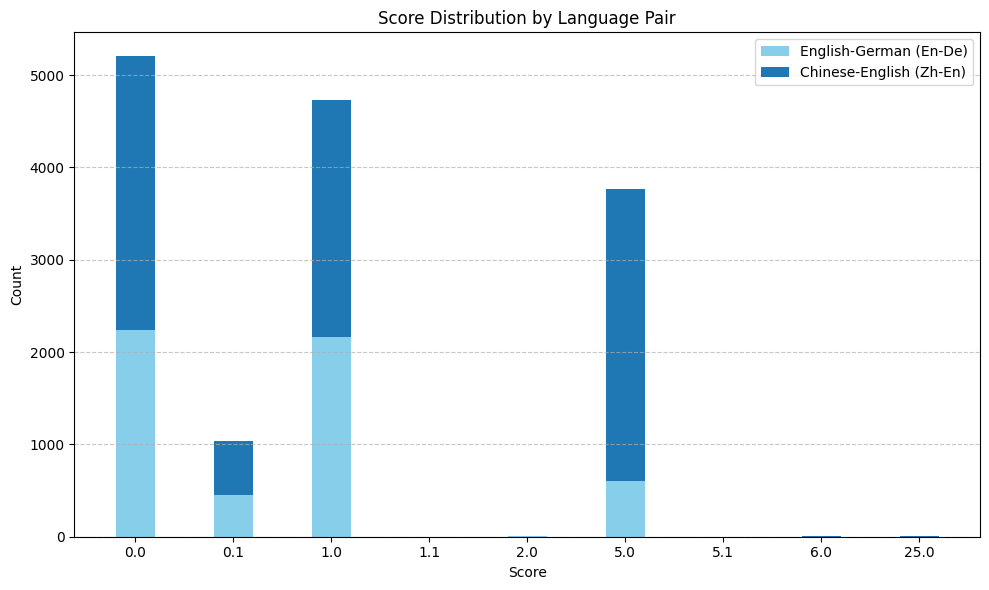

In [ ]:
# Data
scores = [0.0, 0.1, 1.0, 1.1, 2.0, 5.0, 5.1, 6.0, 25.0]
english_german = [2234, 451, 2160, 0, 4, 605, 0, 2, 0]
chinese_english = [2968, 589, 2564, 2, 6, 3156, 1, 4, 4]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
bar_width = 0.4
index = np.arange(len(scores))
# index = range(len(scores))
bar1 = plt.bar(index, english_german, bar_width, label='English-German (En-De)', color='skyblue')
bar2 = plt.bar(index, chinese_english, bar_width, label='Chinese-English (Zh-En)', bottom=english_german)

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution by Language Pair')
plt.xticks(index, scores)
plt.legend()

# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Tokenisation

In [ ]:
from transformers import AutoTokenizer
import torch
import numpy as np
from datasets import Dataset, DatasetDict

In [ ]:
BASE_MODEL = "xlm-roberta-base"
LEARNING_RATE = 2e-5
MAX_LEN = 512
BATCH_SIZE = 32
EPOCHS = 4

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

In [ ]:
# raw_train_ds = Dataset.from_pandas(train_df)
# raw_val_ds = Dataset.from_pandas(val_df)
raw_test_ds = Dataset.from_pandas(test_df)
raw_ende_test_ds = Dataset.from_pandas(ende_test_df)
raw_zhen_test_ds = Dataset.from_pandas(zhen_test_df)

In [ ]:
# ds = {"train": raw_train_ds, "validation": raw_val_ds, "test": raw_test_ds}
ds = {"test": raw_test_ds}

def preprocess_data(df):
  encoding = tokenizer(df["source"], df["target"], truncation=True, padding="max_length", max_length=MAX_LEN)
  labels_list = [df[label] for label in df.keys() if label in errors]
  encoding["labels"] = np.zeros(len(errors))  # Initialize with zeros
  encoding["labels"][:len(labels_list)] = labels_list  # Assign values

  return encoding

In [ ]:
for split in ds:
    col = ds[split].column_names
    ds[split] = ds[split].map(preprocess_data, remove_columns=col)

Map:   0%|          | 0/14751 [00:00<?, ? examples/s]

In [ ]:
one_lang = {"ende": raw_ende_test_ds, "zhen": raw_zhen_test_ds}

for split in one_lang:
  col = one_lang[split].column_names
  one_lang[split] = one_lang[split].map(preprocess_data, remove_columns=col)

Map:   0%|          | 0/5456 [00:00<?, ? examples/s]

Map:   0%|          | 0/9294 [00:00<?, ? examples/s]

# Training

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from transformers import TrainingArguments, Trainer, XLMRobertaForSequenceClassification

model = XLMRobertaForSequenceClassification.from_pretrained(BASE_MODEL, problem_type="multi_label_classification",
                                                           num_labels=len(errors),
                                                           id2label=id2label,
                                                           label2id=label2id)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="../models/xlmr_multi_classification",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=EPOCHS,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    remove_unused_columns=False,
)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction
from scipy.stats import pearsonr
import torch

# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))

    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1

    # Compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(predictions.flatten(), labels.flatten())

    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy,
               'pearson_corr': pearson_corr}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result

In [ ]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["validation"],
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy,Pearson Corr
1,0.058800,0.060195,0.000000,0.500000,0.356450,0.264281
2,0.043600,0.054560,0.440309,0.669228,0.575825,0.313724
3,0.038700,0.052723,0.488016,0.691025,0.603823,0.321267



```
TrainOutput(global_step=5532, training_loss=0.050445251527766945, metrics={'train_runtime': 4407.1564, 'train_samples_per_second': 40.161, 'train_steps_per_second': 1.255, 'total_flos': 4.658549328258662e+16, 'train_loss': 0.050445251527766945, 'epoch': 4.0})
```





In [ ]:
trainer.eval_dataset = ds["test"]
trainer.evaluate()

{'eval_loss': 0.05266327038407326,
 'eval_f1': 0.48900112979331434,
 'eval_roc_auc': 0.6909168107657295,
 'eval_accuracy': 0.6018575011863603,
 'eval_pearson_corr': 0.32244270680118275,
 'eval_runtime': 109.8209,
 'eval_samples_per_second': 134.319,
 'eval_steps_per_second': 4.198,
 'epoch': 4.0}

In [ ]:
trainer.model.push_to_hub("xlmr_multi_classification")

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/aningddd/xlmr_multi_classification/commit/c23b76c8e6ca2a630df2fcf0da8d05f4d0303f13', commit_message='Upload XLMRobertaForSequenceClassification', commit_description='', oid='c23b76c8e6ca2a630df2fcf0da8d05f4d0303f13', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
trainer.eval_dataset = one_lang["ende"]
trainer.evaluate()

{'eval_loss': 0.05845816060900688,
 'eval_f1': 0.3080660835762876,
 'eval_roc_auc': 0.5976125571020836,
 'eval_accuracy': 0.5256598240469208,
 'eval_pearson_corr': 0.25938774623858557,
 'eval_runtime': 40.4319,
 'eval_samples_per_second': 134.943,
 'eval_steps_per_second': 4.229,
 'epoch': 4.0}

In [ ]:
trainer.eval_dataset = one_lang["zhen"]
trainer.evaluate()

{'eval_loss': 0.04926694184541702,
 'eval_f1': 0.5571310950507731,
 'eval_roc_auc': 0.7384289689327337,
 'eval_accuracy': 0.6465461588121368,
 'eval_pearson_corr': 0.3572175341239048,
 'eval_runtime': 68.8834,
 'eval_samples_per_second': 134.924,
 'eval_steps_per_second': 4.225,
 'epoch': 4.0}

# Error

In [ ]:
from transformers import AutoModelForSequenceClassification
from huggingface_hub import notebook_login

notebook_login()
model = AutoModelForSequenceClassification.from_pretrained("aningddd/xlmr_multi_classification")

In [ ]:
import math

threshold = 0.5
nb_batches = math.ceil(len(raw_test_ds) / BATCH_SIZE)
y_preds = []

model.to("cuda")

for i in range(nb_batches):
    input_source = raw_test_ds[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]["source"]
    input_target = raw_test_ds[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]["target"]
    input_labels = ds["test"][i * BATCH_SIZE: (i + 1) * BATCH_SIZE]["labels"]
    encoded = tokenizer(input_source, input_target, truncation=True, padding="max_length", max_length=MAX_LEN, return_tensors="pt").to("cuda")

    # Get model predictions (probability scores for each label)
    # logits = trainer.model(**encoded).logits
    logits = model(**encoded).logits
    probabilities = torch.sigmoid(logits)

    # Apply threshold to determine predicted labels
    predicted_labels = (probabilities > threshold).cpu().numpy().astype(int)

    y_preds += predicted_labels.tolist()

# Create a DataFrame to compare predictions with ground truth
pd.set_option('display.max_rows', 500)
df = pd.DataFrame([raw_test_ds["source"], raw_test_ds["target"], ds["test"]["labels"], y_preds],
                  ["Source", "Target", "Labels", "Prediction"]).T

In [ ]:
def vector2score(pred_vector):
  score = 0.0
  # pred_vector = pred_vector.strip('][').split(', ')

  for i, val in enumerate(pred_vector):
    # print(i, val, type(val))
    if int(val) == 1:
      # print("val: ", val, " i: ", i)
      label = id2label[i]
      score += float(label.split('_')[-1])
  return score

In [ ]:
df['Score'] = df['Prediction'].apply(vector2score)

In [ ]:
df['mqm_score'] = raw_test_ds["mqm_score"]

In [ ]:
df

,Source,Target,Labels,Prediction,Score,mqm_score
0,Iran reports lowest number of daily COVID-19 c...,Iran meldet<v> niedrigste</v> Zahl an tägliche...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1.0,1.0
1,If the book still has issues to open after syn...,Falls das Buch nach der Synchronisation im E-R...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0
2,"""Russia should be in no doubt that further mil...","""Russland sollte keinen Zweifel daran haben, d...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.1,0.1
3,"I do apologise about this, as the account hold...","Ich entschuldige mich dafür, da der Kontoinhab...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
4,"Beside 'Repair your #PRS_ORG# account', tap Re...","Neben ""Reparieren Sie Ihr # PRS _ ORG # -Konto...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
...,...,...,...,...,...,...
14746,“最好原则”的最大问题在于门槛太高，它往往超越了普通人的能力极限，让绝大多数人“望门兴叹” 。,The biggest problem with the “best principle” ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.1,0.1
14747,去之前看了店里的拍摄作品，更多的是户外婚纱，拍的很漂亮，涉及到的拍摄风格也很多。,"Before I went there, I saw the shooting works ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,5.0
14748,马三立先生那段著名的《从明天开始》的相声，就是最传神地表现了这一“普遍人性”的经典。,Mr. Ma Sanli's famous comic “Starting Tomorrow...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,5.0
14749,他同时认为，数字化转型需驱动向纵深发展和可持续发展，参与新冠肺炎疫情防控、经济复苏和发展、应...,He also believes that digital transformation n...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,5.0


In [ ]:
df

,Source,Target,Labels,Prediction,Score,mqm_score
0,Iran reports lowest number of daily COVID-19 c...,Iran meldet<v> niedrigste</v> Zahl an tägliche...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",1.0,1.0
1,If the book still has issues to open after syn...,Falls das Buch nach der Synchronisation im E-R...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0.0
2,"""Russia should be in no doubt that further mil...","""Russland sollte keinen Zweifel daran haben, d...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.1,0.1
3,"I do apologise about this, as the account hold...","Ich entschuldige mich dafür, da der Kontoinhab...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
4,"Beside 'Repair your #PRS_ORG# account', tap Re...","Neben ""Reparieren Sie Ihr # PRS _ ORG # -Konto...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,1.0
...,...,...,...,...,...,...
14746,“最好原则”的最大问题在于门槛太高，它往往超越了普通人的能力极限，让绝大多数人“望门兴叹” 。,The biggest problem with the “best principle” ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",0.1,0.1
14747,去之前看了店里的拍摄作品，更多的是户外婚纱，拍的很漂亮，涉及到的拍摄风格也很多。,"Before I went there, I saw the shooting works ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,5.0
14748,马三立先生那段著名的《从明天开始》的相声，就是最传神地表现了这一“普遍人性”的经典。,Mr. Ma Sanli's famous comic “Starting Tomorrow...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,5.0
14749,他同时认为，数字化转型需驱动向纵深发展和可持续发展，参与新冠肺炎疫情防控、经济复苏和发展、应...,He also believes that digital transformation n...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,5.0


In [ ]:
df.to_csv("multi-classification-pred.csv")